## Example of how to filter waveforms by region
---

In [93]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('./', os.pardir)))

import seisbench.data
from seisbench.util.region import CircleDomain, RectangleDomain, Germany
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

ModuleNotFoundError: No module named 'fiona'

In [90]:
dummy = seisbench.data.DummyDataset()

dummy.metadata['receiver_latitude'] = [np.random.uniform(43, 58) for i in range(len(dummy))]
dummy.metadata['receiver_longitude'] = [np.random.uniform(5, 18) for i in range(len(dummy))]

To filter waveforms by region, class hierarchy simply mimics obspy API where users can define custom domains which inherit from ABC [Domain](https://docs.obspy.org/_modules/obspy/clients/fdsn/mass_downloader/domain.html#Domain). Any region class just needs to overwrite the **is_in_domain()** method This method should return a Boolean response for coordinates lieing inside/outside a given domain. Example below filters based on a simple Circular Region.

In [91]:
# Create domain sublass for filtering stations outside region
class CircleDomain(CircularDomain):
    def __init__(self, latitude, longitude, minradius, maxradius):
        super().__init__(latitude, longitude, minradius, maxradius)

    def is_in_domain(self, latitude, longitude):
        d = ((self.latitude - latitude) ** 2 + (self.longitude - longitude) ** 2) ** 0.5
        if d < self.maxradius and d > self.minradius:
            return True
        return False

lat = 51
lon = 11
min_radius = 2
max_radius = 5

region = CircleDomain(
    latitude=lat, 
    longitude=lon, 
    minradius=min_radius, 
    maxradius=max_radius
)

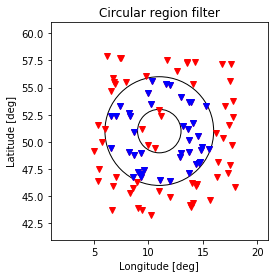

In [92]:
# Plot original unfiltered dataset
plt.plot(dummy.metadata['receiver_longitude'], dummy.metadata['receiver_latitude'], 'rv')

# Filter based on region
waveforms = dummy.region_filter(
    domain=region, 
    lat_col='receiver_latitude', 
    lon_col='receiver_longitude'
)

# PLot filtered dataset
plt.plot(dummy.metadata['receiver_longitude'], dummy.metadata['receiver_latitude'], 'bv')


# Add region to plot
inner_circle = plt.Circle((lon, lat), min_radius, fill=False)
outer_circle = plt.Circle((lon, lat), max_radius, fill=False)

fig = plt.gcf()
ax = fig.gca()
ax.set_aspect(1)
ax.add_artist(inner_circle)
ax.add_artist(outer_circle)
plt.xlim(lon-(max_radius*2), lon+(max_radius*2))
plt.ylim(lat-(max_radius*2), lat+(max_radius*2))
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.title('Circular region filter')
plt.show()